<a href="https://colab.research.google.com/github/vyshnavi-05/AIML_batch_3/blob/main/AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the csv file using pandas library

In [2]:
df = pd.read_csv('/content/fraud_oracle.csv')
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


Preprocessing analysis

In [3]:
df.info(verbose='True')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [4]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


describe() is used to know about several statistical measures such as mean,median,standard deviation and many more.

In [5]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

isnull().sum() is used to count the total number of null values.

In [6]:
df.shape

(15420, 33)

shape tells us about the number of rows and columns.So there are 4482 rows and 33 columns in our data set.

#Data Processing

In [7]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

.columns is used to know names of all the columns present in our data.

In [8]:
new_data=df[['Make','AccidentArea','Sex','MaritalStatus','Age','Fault','PolicyType','VehicleCategory','VehiclePrice','RepNumber','Deductible','DriverRating','Days_Policy_Accident','Days_Policy_Claim','PastNumberOfClaims','AgeOfVehicle','AgeOfPolicyHolder','PoliceReportFiled','WitnessPresent','AgentType','NumberOfSuppliments','AddressChange_Claim','NumberOfCars','BasePolicy']]
new_data

,Make,AccidentArea,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,RepNumber,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,Honda,Urban,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,12,...,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,Liability
1,Honda,Urban,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,15,...,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,Collision
2,Honda,Urban,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,7,...,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,Collision
3,Toyota,Rural,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,4,...,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,Liability
4,Honda,Urban,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,3,...,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Toyota,Urban,Male,Married,35,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,5,...,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
15416,Pontiac,Urban,Male,Married,30,Policy Holder,Sedan - Liability,Sport,30000 to 39000,11,...,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,Liability
15417,Toyota,Rural,Male,Single,24,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,4,...,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,Collision
15418,Toyota,Urban,Female,Married,34,Third Party,Sedan - All Perils,Sedan,20000 to 29000,6,...,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,All Perils


In [9]:
new_data.shape

(15420, 24)

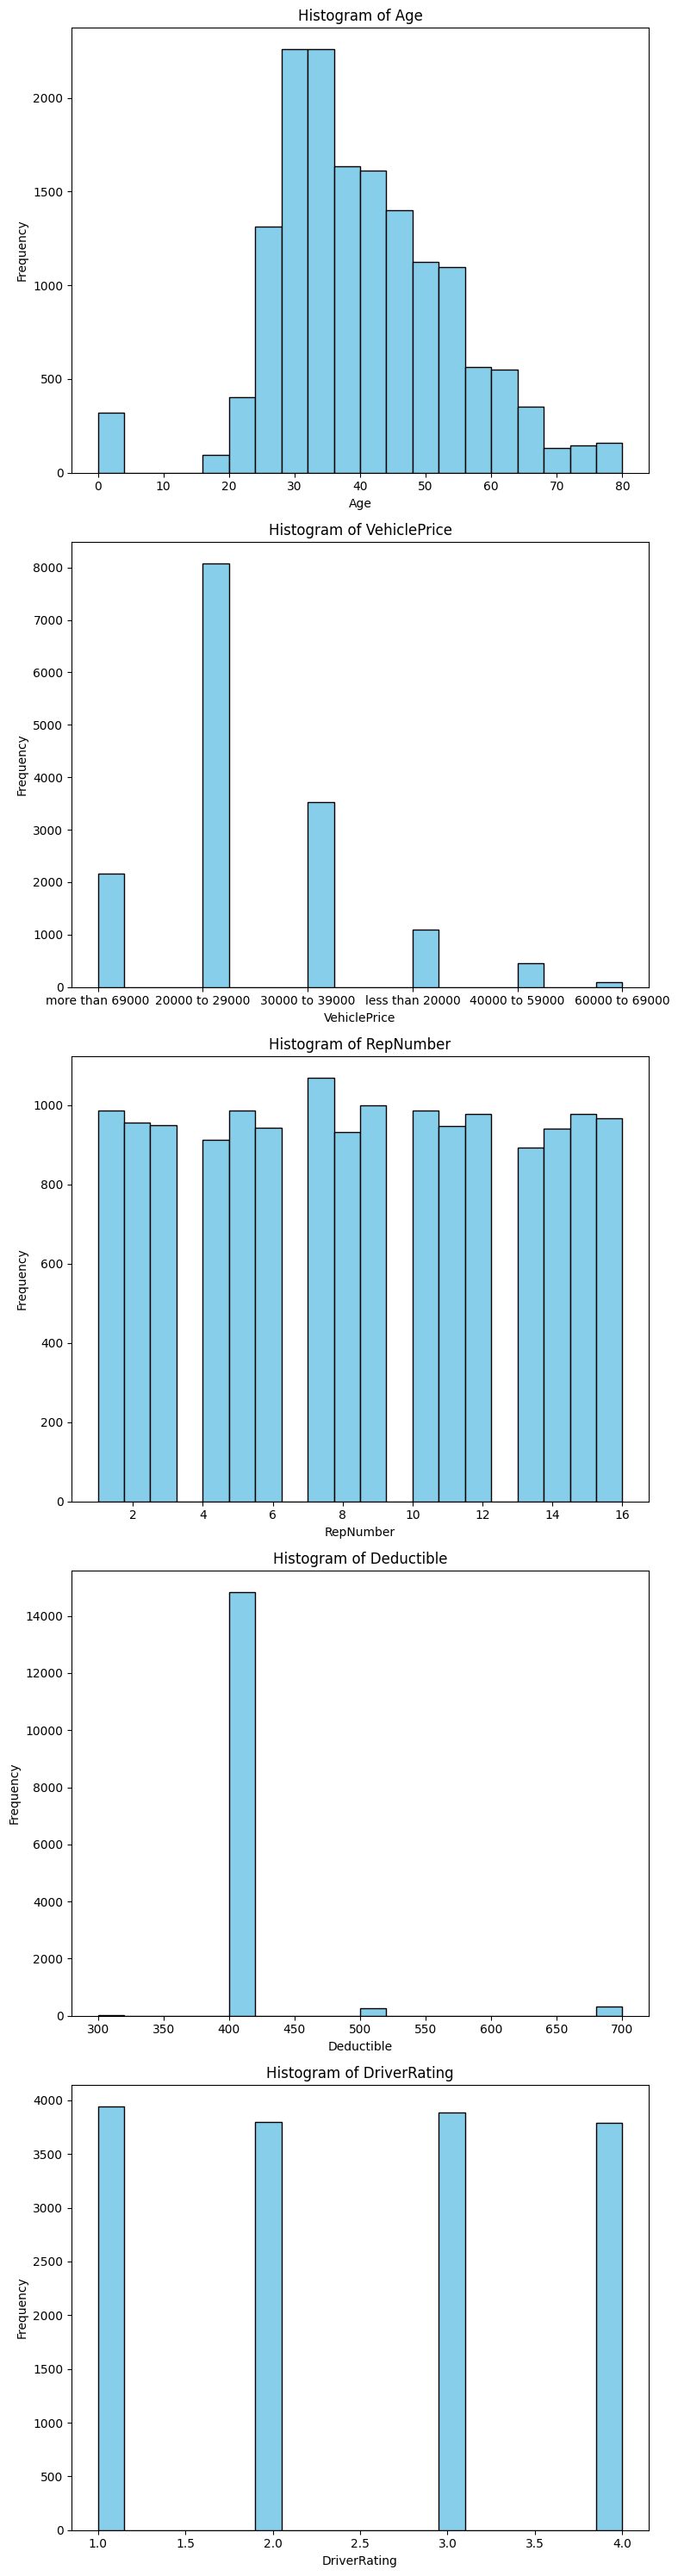

In [10]:
#Histogram
import matplotlib.pyplot as plt

# Features to create histograms for
features = ['Age', 'VehiclePrice', 'RepNumber', 'Deductible', 'DriverRating']

# Create subplots
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(8, 6*len(features)))

# Plot histograms for each feature
for i, feature in enumerate(features):
    axes[i].hist(df[feature], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Adjust layout and display plots
plt.tight_layout()
plt.show()


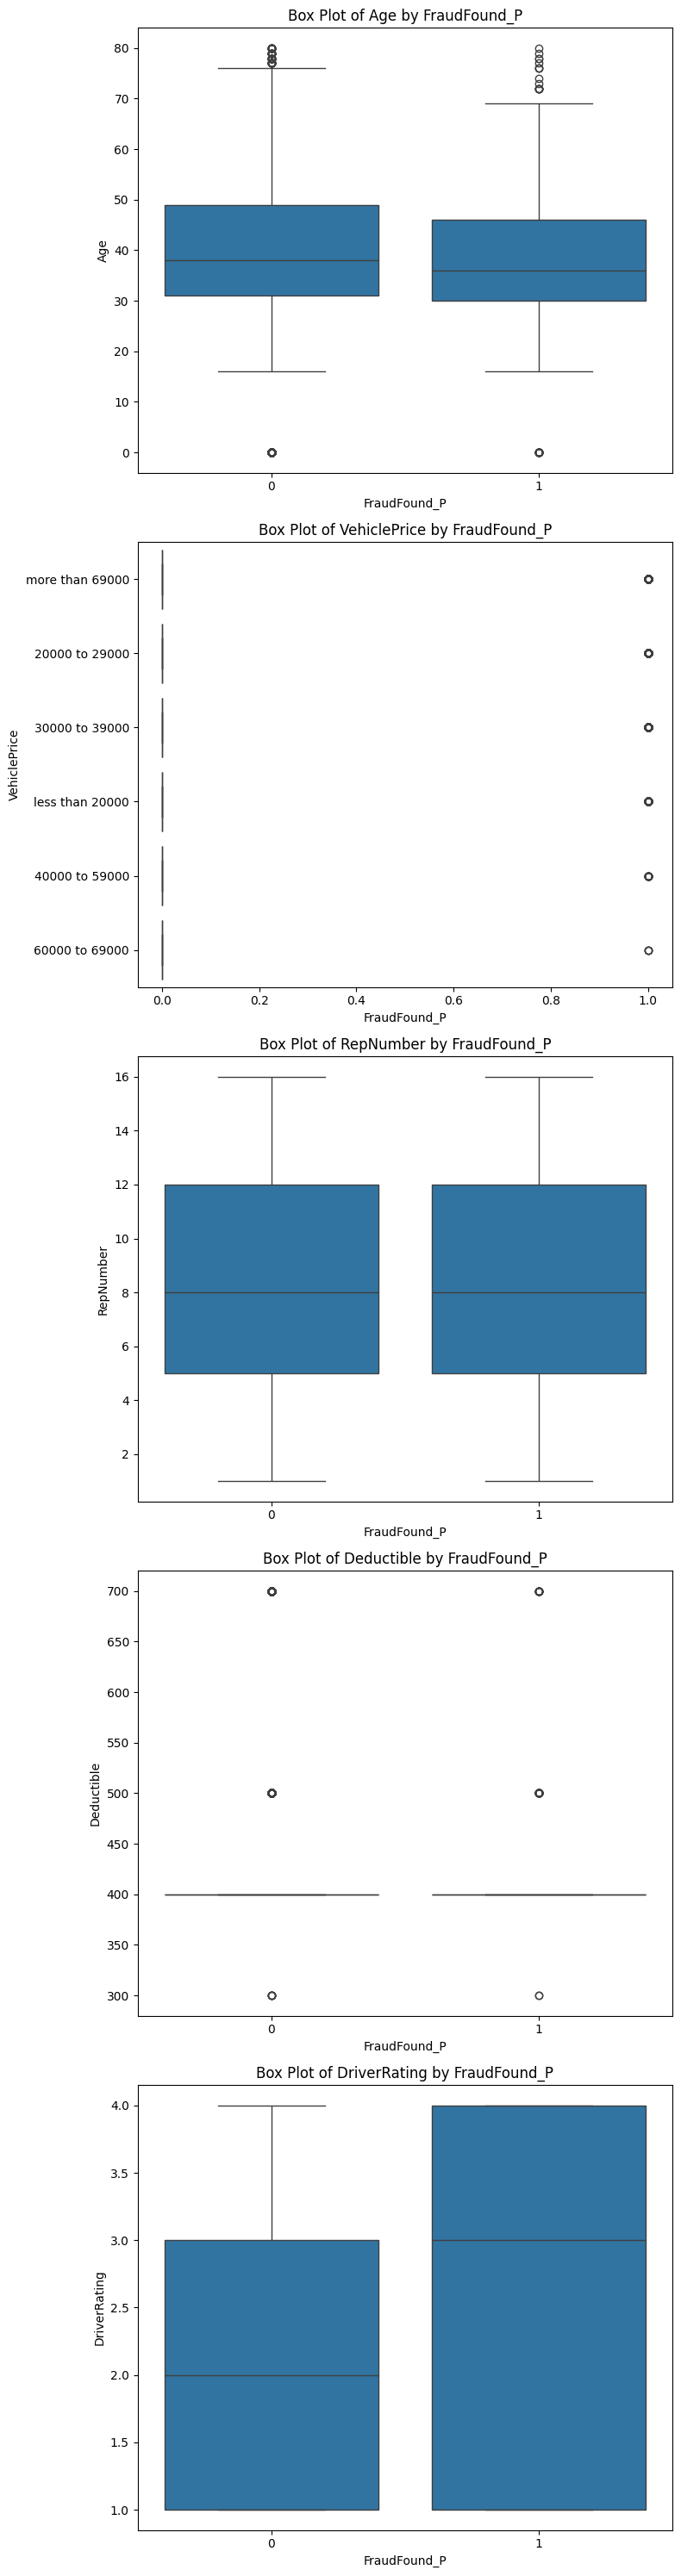

In [11]:
#Box Plots for Numerical Features vs. Target Variable
# Features and target variable
numerical_features = ['Age', 'VehiclePrice', 'RepNumber', 'Deductible', 'DriverRating']
target_variable = 'FraudFound_P'  # Replace 'FraudFound_P' with your actual target variable

# Create subplots
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(8, 6*len(numerical_features)))

# Plot box plots for each feature against the target variable
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=target_variable, y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature} by {target_variable}')
    axes[i].set_xlabel(target_variable)
    axes[i].set_ylabel(feature)

# Adjust layout and display plots
plt.tight_layout()
plt.show()


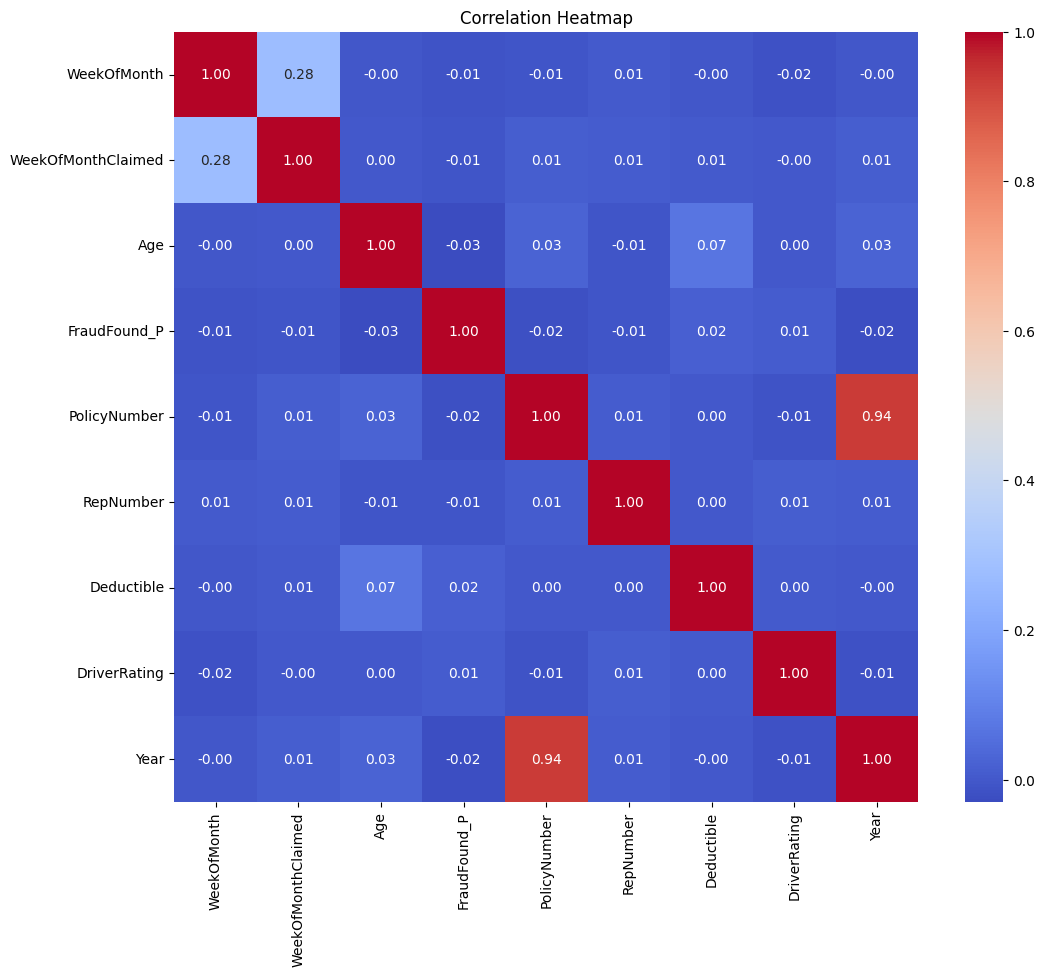

In [12]:
#Correlation Heatmap
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()


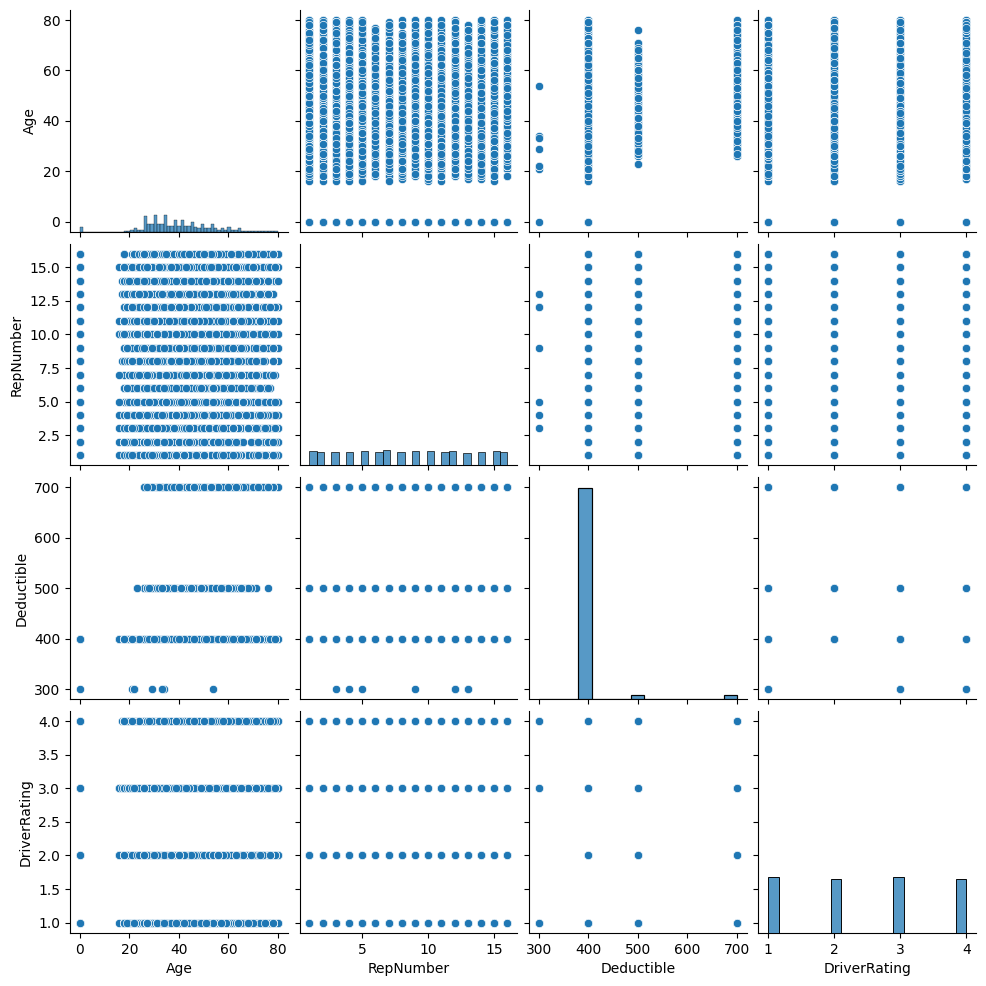

In [13]:
sns.pairplot(new_data)

#Training the Model usind Decision Tree

In [14]:
# Split data into features and target variable
X = df.drop(columns=['FraudFound_P'])  # Features
y = df['FraudFound_P']  # Target variable


In [15]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [16]:
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier

# Define numerical and categorical columns
numerical_columns = selector(dtype_exclude=object)(X_train)
categorical_columns = selector(dtype_include=object)(X_train)

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
])

# Append classifier to preprocessing pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

# Train the model
clf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['WeekOfMonth',
                                                   'WeekOfMonthClaimed', 'Age',
                                                   'PolicyNumber', 'RepNumber',
                                                   'Deductible', 'DriverRating',
                                                   'Year']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unkn...
                                                   'MonthClaimed', 'Sex',
                                                   'MaritalStatus', 'Fault',
                                                   'PolicyType',
                                                   'VehicleCategory',
                                                   'VehiclePrice',
                                                   'Days_Policy_Accident',
                                                   'Days_Policy_Claim',
                                                   'PastNumberOfClaims',
                                                   'AgeOfVehicle',
                                                   'AgeOfPolicyHolder',
                                                   'PoliceReportFiled',
                                                   'WitnessPresent',
                                                   'AgentType',
                                                   'NumberOfSuppliments',
                                                   'AddressChange_Claim',
                                                   'NumberOfCars',
                                                   'BasePolicy'])])),
                ('classifier', DecisionTreeClassifier())])

In [17]:
from sklearn.metrics import accuracy_score, classification_report

# Drop rows with missing values in both X_test and y_test
X_test = X_test.dropna()
y_test = y_test.dropna()

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.922611327280588
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      4341
           1       0.37      0.35      0.36       285

    accuracy                           0.92      4626
   macro avg       0.66      0.66      0.66      4626
weighted avg       0.92      0.92      0.92      4626



In [18]:
from sklearn.model_selection import cross_val_score
# Combine features and target variable for dropping rows with missing values
combined_data = pd.concat([X, y], axis=1)

# Drop rows with missing values in both features and target variable
combined_data.dropna(inplace=True)

# Separate features and target variable after handling missing values
X_processed = combined_data.drop(columns=['FraudFound_P'])
y_processed = combined_data['FraudFound_P']

# Cross-validation
cv_scores = cross_val_score(clf, X_processed, y_processed, cv=5)
print("Cross-validation Mean Accuracy:", cv_scores.mean())


Cross-validation Mean Accuracy: 0.7121919584954606


#Training Model Using K Nearest Neighbor

In [19]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Assuming X contains your features and y contains the target variable
# Select a categorical feature (e.g., 'Make') for training
categorical_feature = ['Make']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[categorical_feature], df['FraudFound_P'], test_size=0.3, random_state=42)

# Preprocess categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_feature)],
    remainder='passthrough')

# Create a KNN classifier pipeline
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())])

# Train the KNN classifier
clf.fit(X_train, y_train)

# Predict on the testing set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9383916990920882
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      4341
           1       0.00      0.00      0.00       285

    accuracy                           0.94      4626
   macro avg       0.47      0.50      0.48      4626
weighted avg       0.88      0.94      0.91      4626



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
# Calculate accuracy and misclassification rate
accuracy = accuracy_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

print("Accuracy:", accuracy)
print("Misclassification Rate:", misclassification_rate)

Accuracy: 0.9383916990920882
Misclassification Rate: 0.061608300907911806
